First, we load the historical data, generate the map, and perform the Monte Carlo simulation.

In [11]:
from simulator.simulator import Location, Map, Road, MovementModel, simulate
from simulator.data import generate_map_from_data, generate_mean_movement_model_from_data, load_data, generate_random_movement_model_from_data
from simulator.monte_carlo import simulate_monte_carlo

class DurationDecisionMetric:
   def get_metric(self, r: Road, m: MovementModel) -> float:
      return m.get_duration_minutes(r)

vienna = Location('Vienna')
innsbruck = Location('Innsbruck')

historical_data = load_data('sample_data.csv')
map = generate_map_from_data(historical_data)

monte_carlo_result = simulate_monte_carlo(map, vienna, innsbruck, historical_data, DurationDecisionMetric(), 1000)

print(monte_carlo_result)

Chosen routes:
['Vienna -> Ansfelden', 'Ansfelden -> Salzburg', 'Salzburg -> Innsbruck']: 973
['Vienna -> Liezen', 'Liezen -> Vorchdorf', 'Vorchdorf -> Salzburg', 'Salzburg -> Innsbruck']: 26
['Vienna -> Liezen', 'Liezen -> Bischofshofen', 'Bischofshofen -> Salzburg', 'Salzburg -> Innsbruck']: 1
Average Duration: 341.21m
Average CO2 emissions: 220.47kg


Now we turn to interpreting the results.

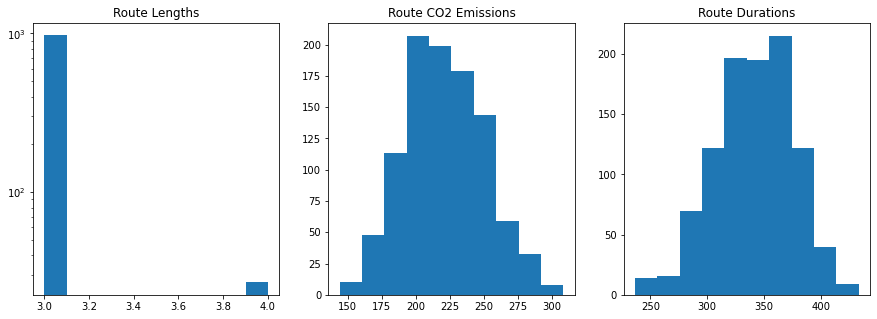

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15,5))

route_counts = monte_carlo_result.route_counts()

route_lengths = [ len(route_result.route.legs) for route_result in monte_carlo_result.route_results ]
axs[0].hist(route_lengths, log=True)
axs[0].set_title('Route Lengths')

route_co2s = [ co2 for (_, co2) in monte_carlo_result.routes_with_co2_kg() ] 
axs[1].hist(route_co2s)
axs[1].set_title('Route CO2 Emissions')

route_durations = [ duration for (_, duration) in monte_carlo_result.routes_with_duration_minutes() ]
axs[2].hist(route_durations)
axs[2].set_title('Route Durations')


In [15]:
from statistics import mean

eta = mean(route_durations)
print(f'ETA: {eta:.2f}m')

acceptable_deviation_minutes = 10

from simulator.risk import risk

r = risk(route_durations, 30)
print(f'Risk: {r*100:.2f}%')

ETA: 341.21m
Risk: 38.27%
